In [1]:
import numpy as np
import matplotlib.pyplot as plt

# importando dados

In [2]:
from os import listdir

In [3]:
path = r"C:\Users\alexv\PycharmProjects\OmniSaude-IA\Data\Dataset/"
list_ = listdir(path)


In [4]:
# carregando os dados de forma separada, pois a intencao é gerar arrays de cada classe
apneias = []
respiracoes = []

for ap in list_:
    if "respiracao" in ap and not("calibracao" in ap):
        respiracoes.append(np.load(path + ap))
    elif "apneia" in ap and not("calibracao" in ap):
        apneias.append(np.load(path+ap))


In [5]:
_ = apneias.pop(11)  # removendo um exemplo com quantidade menor de pacotes, apenas comodidade

In [6]:
print(f"Quantidade de exemplos de apneias: {len(apneias)}")

Quantidade de exemplos de apneias: 53


In [7]:
print(f"Quantidade de exemplos de respiracao: {len(respiracoes)}")

Quantidade de exemplos de respiracao: 54


### Gerando numpy arrays dos dados de cada classe

In [8]:
apneias = np.array(apneias)

In [9]:
respiracoes = np.array(respiracoes)

In [10]:
# verificando o shape dos arrays
apneias.shape

(53, 135, 300, 57)

In [11]:
respiracoes.shape

(54, 436, 300, 57)

> Entendendo o shape dos arrays:

> (numero_capturas, numero_janelas_amostras, tamanho_janela_pkts, subportadoras)

## Visualizando exemplos

In [12]:
from random import randint, sample

Text(0.5, 1.0, 'Apneias')

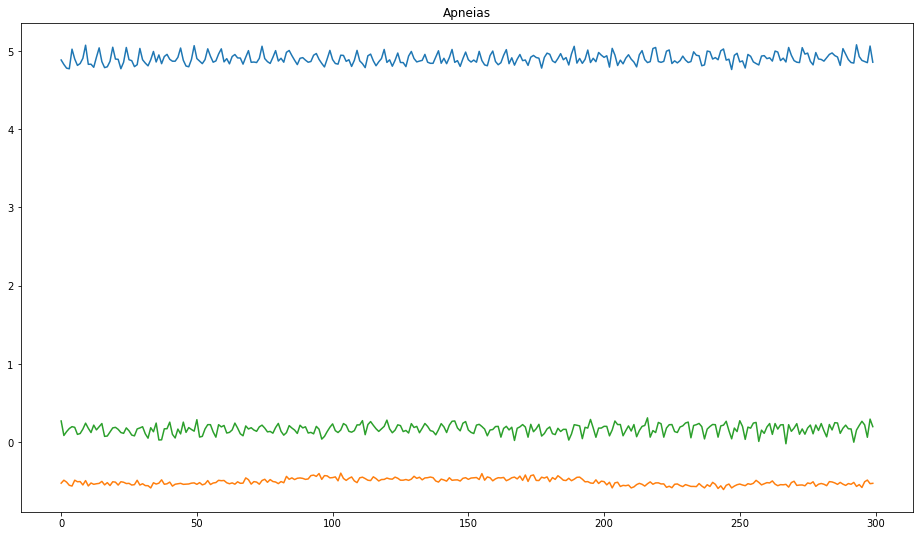

In [13]:
# apneias

def rand():
    rand1 = randint(0, 52)
    rand2 = randint(0, 134)
    return rand1, rand2

rand1,rand2 = rand()
exemplo_1 = apneias[rand1, rand2, :, 0]
rand1,rand2 = rand()
exemplo_2 = apneias[rand1, rand2, :, 0]
rand1,rand2 = rand()
exemplo_3 = apneias[rand1, rand2, :, 0]

plt.figure(figsize=(16, 9))
plt.plot(exemplo_1, label="Exemplo 1")
plt.plot(exemplo_2, label="Exemplo 2")
plt.plot(exemplo_3, label="Exemplo 3")
plt.title("Apneias")

> Podemos perceber que cada exemplo tem um valor em y diferente, o que é uma questão inerente ao problema que estamos abordando! A diferença de fase não tem um range específico e bem definido que pode atuar.

> A solução que penso é tirar a média da janela. Pois assim nós mantemos o comportamento característico da onda, mas ao mesmo tempo trazemos para perto de 0. Ou simplesmente reescalar as ondas para entre 0 e 1 -> min max scaler.

In [14]:
# criando um min max scaler eficiente
def minmax_scaler(data):
    data_min = data.min()
    data_max = data.max()
    data_range = data_max - data_min

    return (data - data_min)/data_range

Text(0.5, 1.0, 'Apneias')

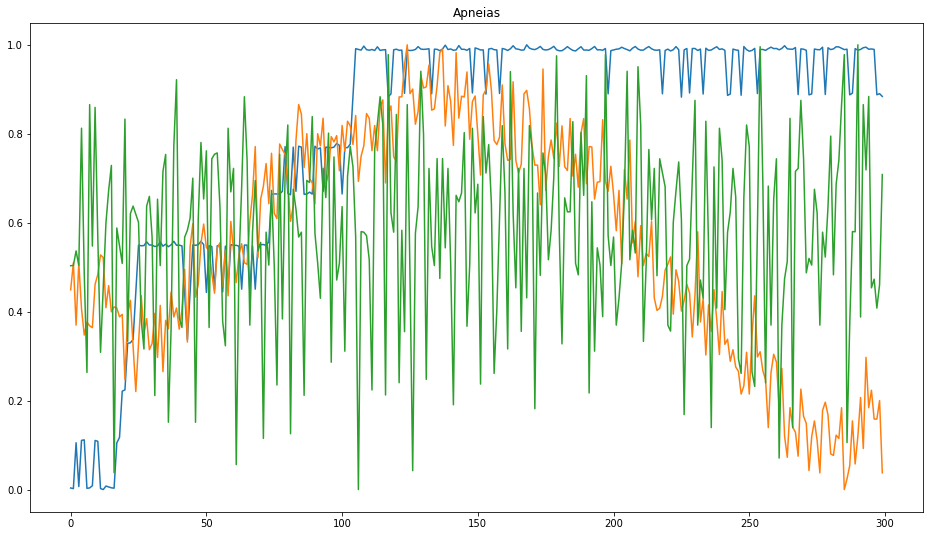

In [15]:
# averiguando o mesmo view com min max aplicado
# apneias

rand1,rand2 = rand()
exemplo_1 = minmax_scaler(apneias[rand1, rand2, :, 0])
rand1,rand2 = rand()
exemplo_2 = minmax_scaler(apneias[rand1, rand2, :, 0])
rand1,rand2 = rand()
exemplo_3 = minmax_scaler(apneias[rand1, rand2, :, 0])

plt.figure(figsize=(16, 9))
plt.plot(exemplo_1, label="Exemplo 1")
plt.plot(exemplo_2, label="Exemplo 2")
plt.plot(exemplo_3, label="Exemplo 3")
plt.title("Apneias")

> De fato há mudanças.

Text(0.5, 1.0, 'Respiracoes')

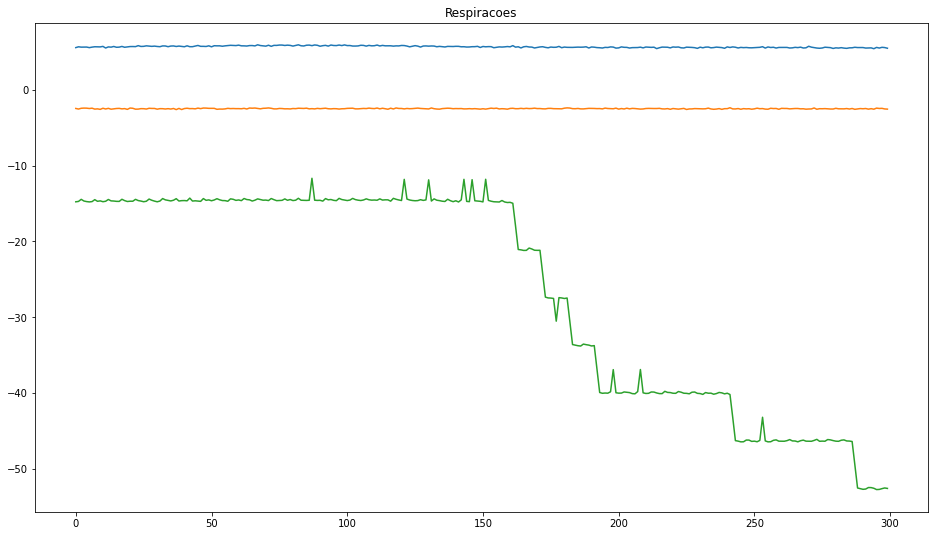

In [16]:
# visualizando respiração

def rand():
    rand1 = randint(0, 53)
    rand2 = randint(0, 435)
    return rand1, rand2


rand1,rand2 = rand()
exemplo_1 = respiracoes[rand1, rand2, :, 0]
rand1,rand2 = rand()
exemplo_2 = respiracoes[rand1, rand2, :, 0]
rand1,rand2 = rand()
exemplo_3 = respiracoes[rand1, rand2, :, 0]

plt.figure(figsize=(16, 9))
plt.plot(exemplo_1, label="Exemplo 1")
plt.plot(exemplo_2, label="Exemplo 2")
plt.plot(exemplo_3, label="Exemplo 3")
plt.title("Respiracoes")

> Acende um alerta: o que fazer com exemplos que não parecem ter variação?

Text(0.5, 1.0, 'Respiracoes')

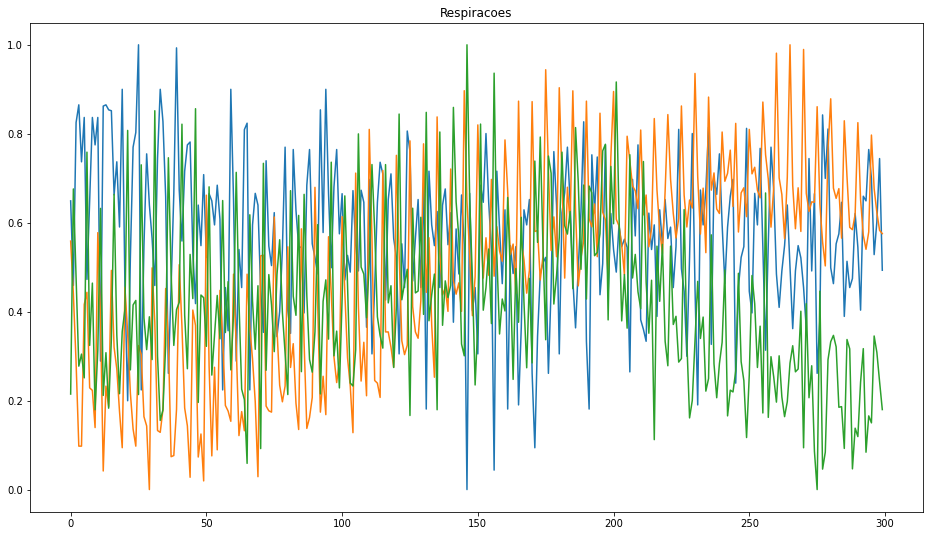

In [17]:
# min max:

rand1,rand2 = rand()
exemplo_1 = minmax_scaler(respiracoes[rand1, rand2, :, 0])
rand1,rand2 = rand()
exemplo_2 = minmax_scaler(respiracoes[rand1, rand2, :, 0])
rand1,rand2 = rand()
exemplo_3 = minmax_scaler(respiracoes[rand1, rand2, :, 0])

plt.figure(figsize=(16, 9))
plt.plot(exemplo_1, label="Exemplo 1")
plt.plot(exemplo_2, label="Exemplo 2")
plt.plot(exemplo_3, label="Exemplo 3")
plt.title("Respiracoes")

> Maravilha! Parece que o minmax ficou muito bom.

## Modelando

### Como vamos criar o X e y?

In [18]:
# pegar amostras aleatorias dos dados de respiracao e apneia, na mesma quantidade.
# assim, conseguimos (ao menos aproximar) de uma distribuição i.i.d.

#### Para respirações

In [19]:
respiracoes.shape

(54, 436, 300, 57)

In [20]:
# guardando alguns dados para teste:
idx = sample(range(0, 53), 10)
RESPIRACOES_TESTE = respiracoes[idx]
respiracoes = np.delete(respiracoes, idx, axis=0)
RESPIRACOES_TESTE.shape

(10, 436, 300, 57)

In [21]:
respiracoes.shape  # está com o shape esperado após perder 10 itens

(44, 436, 300, 57)

In [22]:
# reshape fundindo as capturas de cada pessoa com as amostras obtidas delas (fundir as 2 primeiras dims)
respiracoes = respiracoes.reshape((-1, 300, 57))
respiracoes.shape

(19184, 300, 57)

#### Para apneias

In [23]:
apneias.shape

(53, 135, 300, 57)

In [24]:
# guardando alguns dados para teste:
idx = sample(range(0, 52), 10)
APNEIAS_TESTE = apneias[idx]
apneias = np.delete(apneias, idx, axis=0)
APNEIAS_TESTE.shape

(10, 135, 300, 57)

In [25]:
apneias.shape  # está com o shape esperado após perder 10 itens

(43, 135, 300, 57)

In [26]:
apneias = apneias.reshape((-1, 300, 57))
apneias.shape

(5805, 300, 57)

> Arrays fundidos, agora temos que amostrar aleatoriamente a mesma quantidade de valores de apneia e respiracao para compor nosso dataset de treino, teste e validação.

### Verificando uma coisa

O que fazer com as subportadoras?

> Os dados naturalmente formam uma imagem!
> Como usar essa imagem em algoritmos clássicos? Não podemos tratar cada subport como sendo um exemplo distinto pelo fato de romper com a ideia de i.i.d... mas vamos tentar!

> Caso não dê, uma laternativa é achar a mediana (ou média) das subportadoras, para cada pacote.
> Esse é um esforço para tentar passar os dados de natureza 2d para 3d.

In [27]:
# tratando-as como exemplos separados:
apneias_subport_iid = np.transpose(apneias, axes=[0,2,1]).reshape((-1, 300))
respiracoes_subport_iid = np.transpose(respiracoes, axes=[0,2,1]).reshape((-1, 300))

In [28]:
apneias_subport_iid.shape

(330885, 300)

In [29]:
respiracoes_subport_iid.shape

(1093488, 300)

#### Colocando o rótulo em cada classe

1 - Apneia
0 - Não apneia

In [30]:
respiracoes_subport_iid.shape

(1093488, 300)

In [31]:
apneias_subport_iid.shape

(330885, 300)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
rng = np.random.default_rng()  # apenas para amostrar o array de respiracao

In [34]:
# separando em x_train e y_train respiracao
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(rng.choice(respiracoes_subport_iid, apneias_subport_iid.shape[0]),
                                                            np.zeros(apneias_subport_iid.shape[0]), test_size=0.3)

In [35]:
# separando em x_train e y_train apneia
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(apneias_subport_iid, np.ones(apneias_subport_iid.shape[0]), test_size=0.3)

In [36]:
X_train_a.shape, X_train_r.shape, X_test_a.shape, X_test_r.shape

((231619, 300), (231619, 300), (99266, 300), (99266, 300))

In [37]:
# unindo os arrays correspondentes
X_train = np.concatenate((X_train_r, X_train_a))
y_train = np.concatenate((y_train_r, y_train_a))
X_test = np.concatenate((X_test_r, X_test_a))
y_test = np.concatenate((y_test_r, y_test_a))

del X_test_a, X_test_r, X_train_a, X_train_r, y_test_a, y_test_r, y_train_a, y_train_r

In [38]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((463238, 300), (463238,), (198532, 300), (198532,))

#### Embaralhando os vetores

In [39]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [40]:
X_train, y_train = unison_shuffled_copies(X_train, y_train)
X_test, y_test = unison_shuffled_copies(X_test, y_test)

#### Passando o minmax_scaler nos vetores

In [41]:
def minmax_scaler(data):
    data_min = data.min()
    data_max = data.max()
    data_range = data_max - data_min

    return (data - data_min)/data_range

In [42]:
X_train = np.apply_along_axis(minmax_scaler, axis=1, arr=X_train)
X_test = np.apply_along_axis(minmax_scaler, axis=1, arr=X_test)

## Modelando com pycaret

In [43]:
import pandas as pd

In [44]:
df = pd.DataFrame(np.concatenate((X_train, X_test), axis=0), dtype=np.float32)

In [45]:
df_y = pd.DataFrame(np.concatenate((y_train, y_test), axis=0), columns=["y"], dtype=np.float32)

In [46]:
data = pd.concat((df, df_y), axis=1)

In [47]:
del df, df_y

### Invocando o grande

In [48]:
from pycaret.classification import *
clf1 = setup(data, target = 'y', preprocess=False, use_gpu=True, n_jobs=6)

,Description,Value
0,session_id,5444
1,Target,y
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(661770, 301)"
5,Missing Values,False
6,Numeric Features,300
7,Categorical Features,0
8,Transformed Train Set,"(463238, 300)"
9,Transformed Test Set,"(198532, 300)"


In [ ]:
# compare models
compare_models()

IntProgress(value=0, description='Processing: ', max=74)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:23:52
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
